In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os
import seaborn as sns
import pandas as pd
import time
import random
import pickle
import time
import itertools
from scipy.stats import pearsonr
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length

%matplotlib inline

In [2]:
df = pd.DataFrame()

#3
#nodes = ('A', 'B', 'C')
#4
#nodes = ('A', 'B', 'C', 'D')
#5
#nodes = ['A', 'B', 'C', 'D', 'E']
#6
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
#7
#nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
#8
#nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
#9
#nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
#10
#nodes = ['A', 'B', 'C', 'D', 'E', 'F','G', 'H', 'I', 'J']
#11
#nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K']
n = len(nodes)
networks = 30

# データ読み込み

In [3]:
cm_path = "./cm/{0}_nodes_cm.npy".format(len(nodes))
edge_path = "./edge/{0}_nodes_edge.json".format(len(nodes))
cm_list = np.load(cm_path)
with open(edge_path, 'rb') as fp:
    edges = pickle.load(fp)

In [10]:
phis_path = "./phis/{0}_nodes_phis.json".format(len(nodes))
success_state_path = "./success_states/{0}_nodes_success_state.json".format(len(nodes))

with open(success_state_path, 'rb') as fp:
    success_state = pickle.load(fp)
with open(phis_path, 'rb') as fp:
    phis = pickle.load(fp)

# plot

## max

In [14]:
degree_centers_nodes = []
close_centers_nodes = []
degrees_nodes = []
between_centers_nodes = []
eigen_centers_nodes = []
cluster_nodes = []
short_path_length_nodes = []

In [15]:
phis_list = []
for i in range(30):
    phis_list.append(max(phis[i]))

In [18]:
max_degree_centers= []
max_close_centers= []
max_degrees= []
max_between_centers= [] 
max_eigen_centers= []
max_cluster = []

sum_between_centers = []
sum_degree_centers = []
sum_close_centers = []
sum_degrees = []
sum_eigen_centers = []
sum_cluster = []

mean_cluster = []
mean_short_path_length = []

In [19]:
for i in range(30):
    #cm, edges = make_cm_edges(nodes, 30)
    cm = np.load(cm_path)
    with open(edge_path, 'rb') as fp:
        edges = pickle.load(fp)
    
    
    
    # 有向グラフを作成する。
    G = nx.DiGraph()
    # ノード一覧を追加する。
    G.add_nodes_from(nodes)
    # エッジ一覧を追加する。
    G.add_edges_from(edges[i])
    
    degrees = dict(nx.degree(G))
    degree_centers = nx.degree_centrality(G)
    close_centers = nx.closeness_centrality(G)
    between_centers = nx.betweenness_centrality(G)
    eigen_centers = nx.eigenvector_centrality_numpy(G)
    cluster = nx.clustering(G)
    mean_c = nx.algorithms.cluster.average_clustering(G)
    mean_l = average_shortest_path_length(G)
    mean_cluster.append(mean_c)
    mean_short_path_length.append(mean_l)
    
    
    sum_between_centers.append(sum(between_centers.values()))
    sum_degree_centers.append(sum(degree_centers.values()))
    sum_close_centers.append(sum(close_centers.values()))
    sum_degrees.append(sum(degrees.values()))
    sum_eigen_centers.append(sum(eigen_centers.values()))
    sum_cluster.append(sum(cluster.values()))

    
    max_degree_centers.append(degree_centers[max(degree_centers)])
    max_close_centers.append(close_centers[max(close_centers)])
    max_degrees.append(degrees[max(degrees)])
    max_eigen_centers.append(eigen_centers[max(eigen_centers)])
    max_between_centers.append(between_centers[max(between_centers)])
    max_cluster.append(cluster[max(cluster)])

In [20]:
max_dic = {"phi":phis_list, "degree_centers":max_degree_centers, "close_centers":max_close_centers, "degrees":max_degrees, "eigen_centers":max_eigen_centers,"between_centers":max_between_centers, "cluster":max_cluster}

In [21]:
max_df = pd.DataFrame(max_dic)

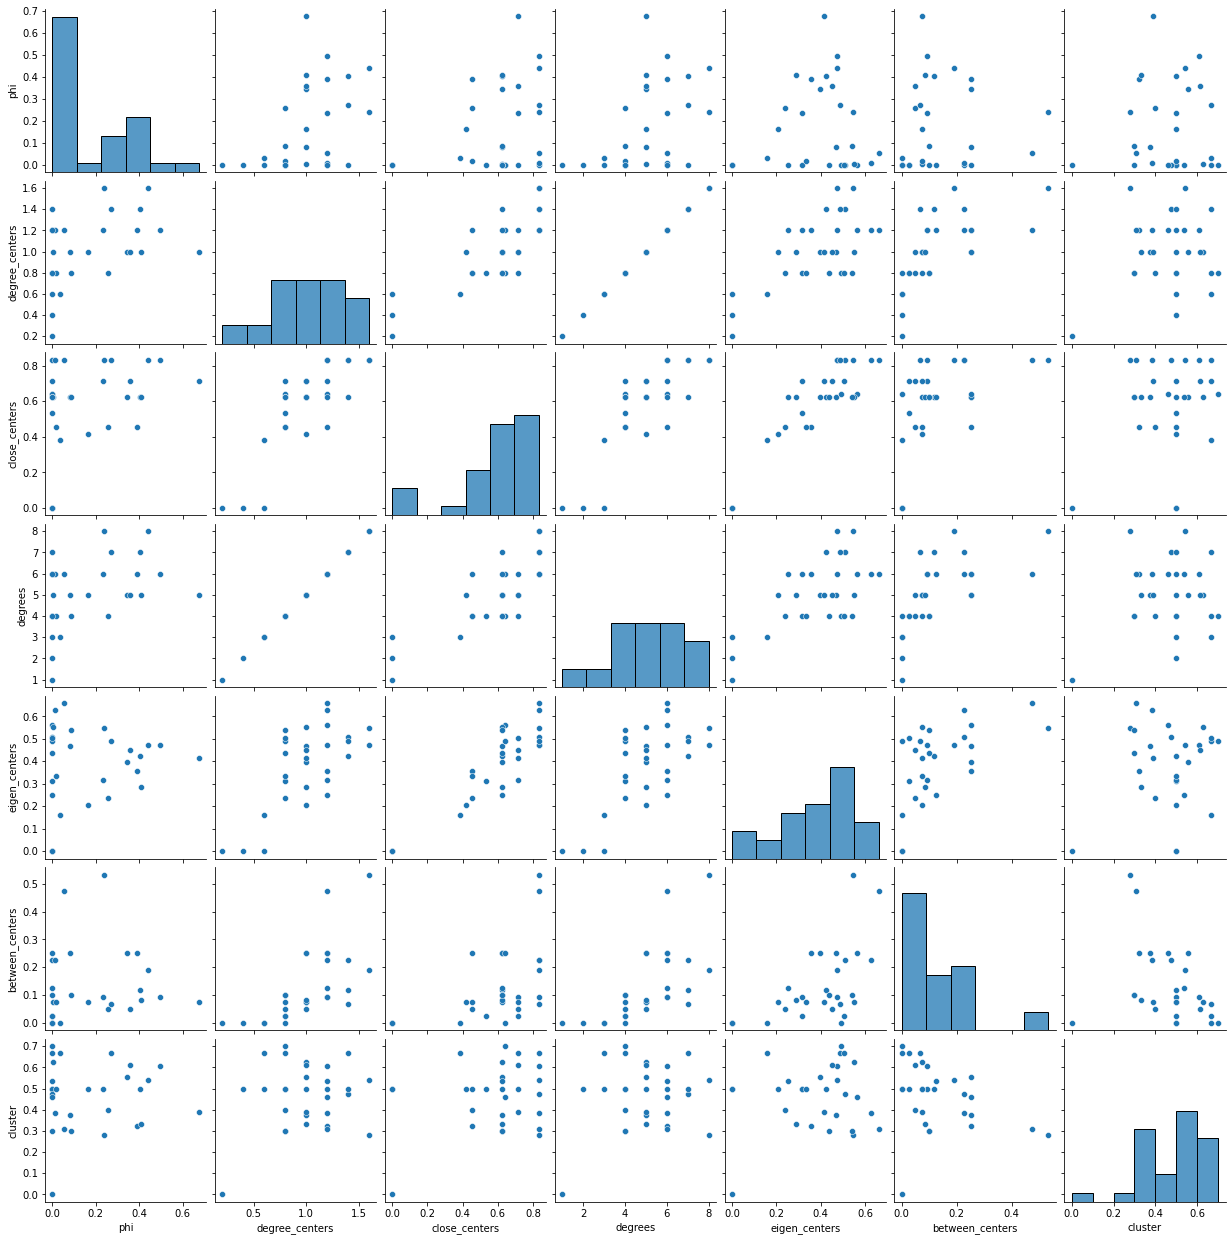

In [22]:
sns.pairplot(max_df)

In [91]:
c_list = ["degree_centers", "close_centers","degrees", "eigen_centers","between_centers","cluster"]

In [25]:
for i in c_list:
  k, l = pearsonr(max_df["phi"].values, max_df[i].values)
  print("{0}_r:".format(i),k)
  print("{0}_p:".format(i),l)

degree_centers_r: 0.43254242181305835
degree_centers_p: 0.01697424351031094
close_centers_r: 0.33350931833518693
close_centers_p: 0.07169510306081246
degrees_r: 0.4325424218130584
degrees_p: 0.016974243510310884
eigen_centers_r: 0.1191202197961862
eigen_centers_p: 0.5306832163155404
between_centers_r: 0.09719369847822441
between_centers_p: 0.6093903952034071
cluster_r: 0.01843616138094789
cluster_p: 0.922967600460267


## mean

In [26]:
mean_between_centers = [x/6 for x in sum_between_centers]
mean_degree_centers = [x/6 for x in sum_degree_centers]
mean_close_centers = [x/6 for x in sum_close_centers]
mean_degrees = [x/6 for x in sum_degrees]
mean_eigen_centers = [x/6 for x in sum_eigen_centers]
mean_cluster = [x/6 for x in sum_cluster]

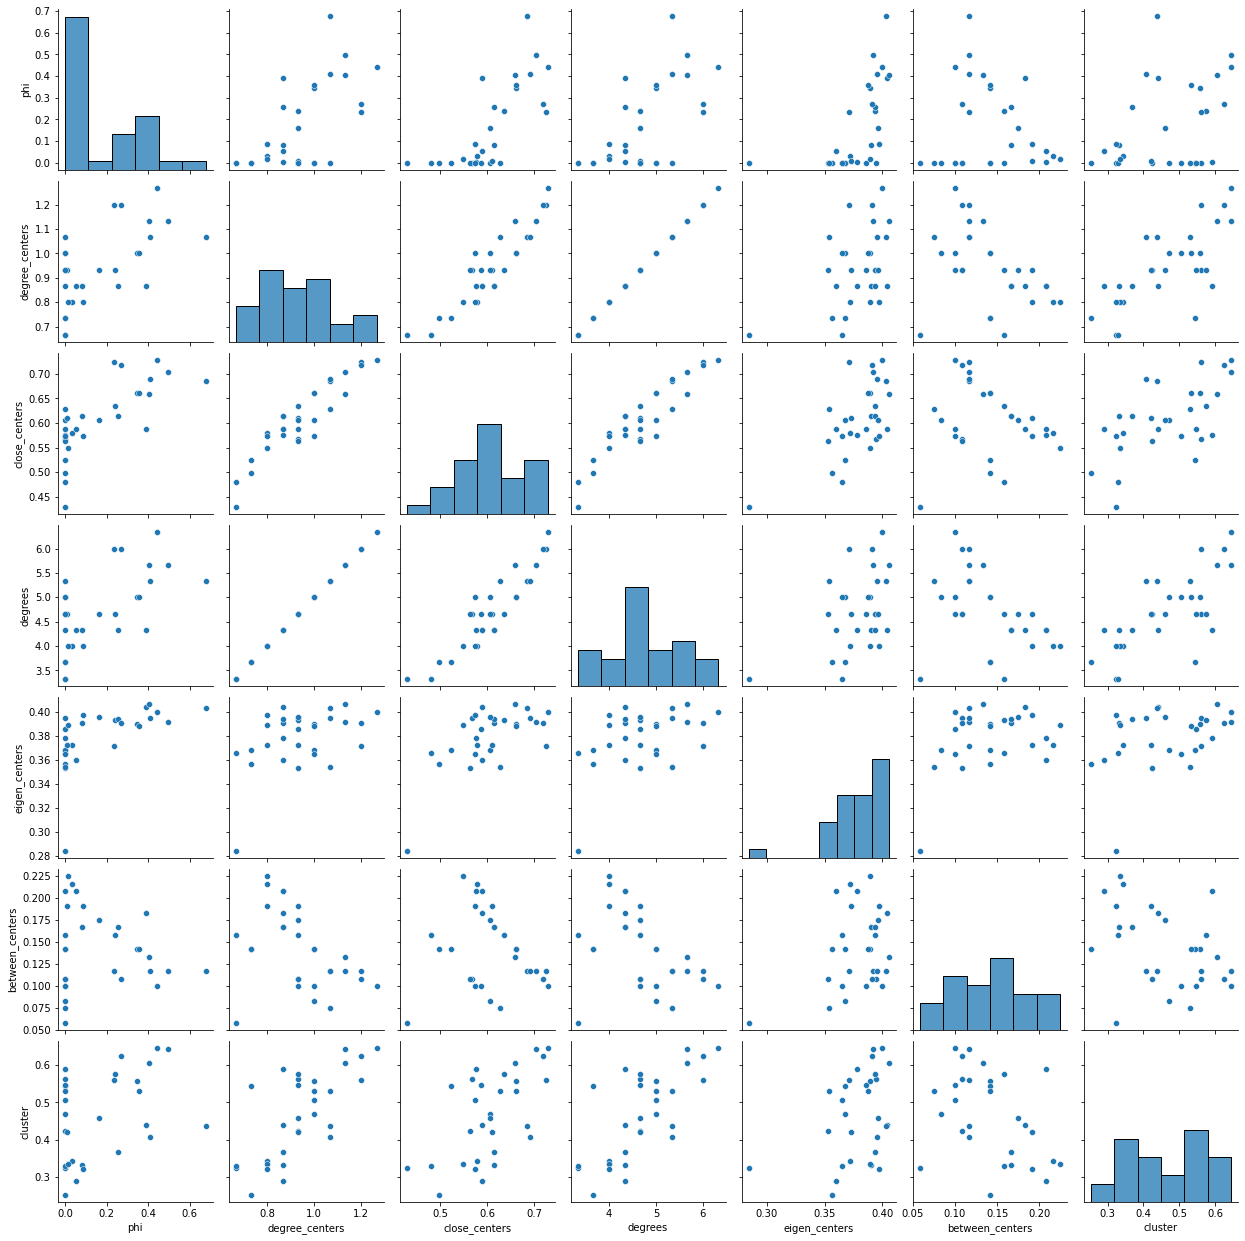

In [27]:
mean_dic = {"phi":phis_list, "degree_centers":mean_degree_centers, "close_centers":mean_close_centers, "degrees":mean_degrees, "eigen_centers":mean_eigen_centers,"between_centers":mean_between_centers,"cluster":mean_cluster}
mean_df = pd.DataFrame(mean_dic)
sns.pairplot(mean_df)

In [28]:
for i in c_list:
  k, l = pearsonr(mean_df["phi"].values, mean_df[i].values)
  print("{0}_r:".format(i),k)
  print("{0}_p:".format(i),l)

degree_centers_r: 0.613640461204057
degree_centers_p: 0.00031065959121196764
close_centers_r: 0.7312375510713299
close_centers_p: 4.4333994480355376e-06
degrees_r: 0.6136404612040571
degrees_p: 0.00031065959121196715
eigen_centers_r: 0.5750745195937069
eigen_centers_p: 0.0008864690295022392
between_centers_r: -0.12404149161855219
between_centers_p: 0.5137151183558925
cluster_r: 0.38401385471554933
cluster_p: 0.03616696429740992


# randomnetworks

In [29]:
def make_cm(nodes, seed):
    np.random.seed(seed)
    a = np.random.randint(0, 2,(len(nodes),len(nodes)))
    b = np.diag(a, k=0)
    cm = a - np.diag(b)

    edges = []
    for col in range(len(cm)):
        for row in range(len(cm)):
            if cm[col][row] == 1:
                edges.append((nodes[col],nodes[row]))
    
    return cm, edges

In [30]:
random_l = []
random_c = []

In [31]:
for seed in range(30):
    cm, edges = make_cm(nodes, seed)
    
    
    # 有向グラフを作成する。
    G = nx.DiGraph()
    # ノード一覧を追加する。
    G.add_nodes_from(nodes)
    # エッジ一覧を追加する。
    G.add_edges_from(edges)
    

    random_l.append(nx.average_shortest_path_length(G))
    random_c.append(nx.algorithms.cluster.average_clustering(G))

In [32]:
c_random = sum(random_c)/len(random_c)
l_random = sum(random_l)/len(random_l)

# smallworld

In [33]:
mean_c = nx.algorithms.cluster.average_clustering(G)
mean_l = nx.average_shortest_path_length(G)

In [34]:
gamma = [x/c_random for x in mean_cluster]

In [36]:
gamma = [x/c_random for x in mean_cluster]
s_lambda = [x/l_random for x in mean_short_path_length]

In [37]:
g = np.array(gamma)
l = np.array(s_lambda)

In [38]:
sigma = g/l

In [39]:
sigma = list(sigma)

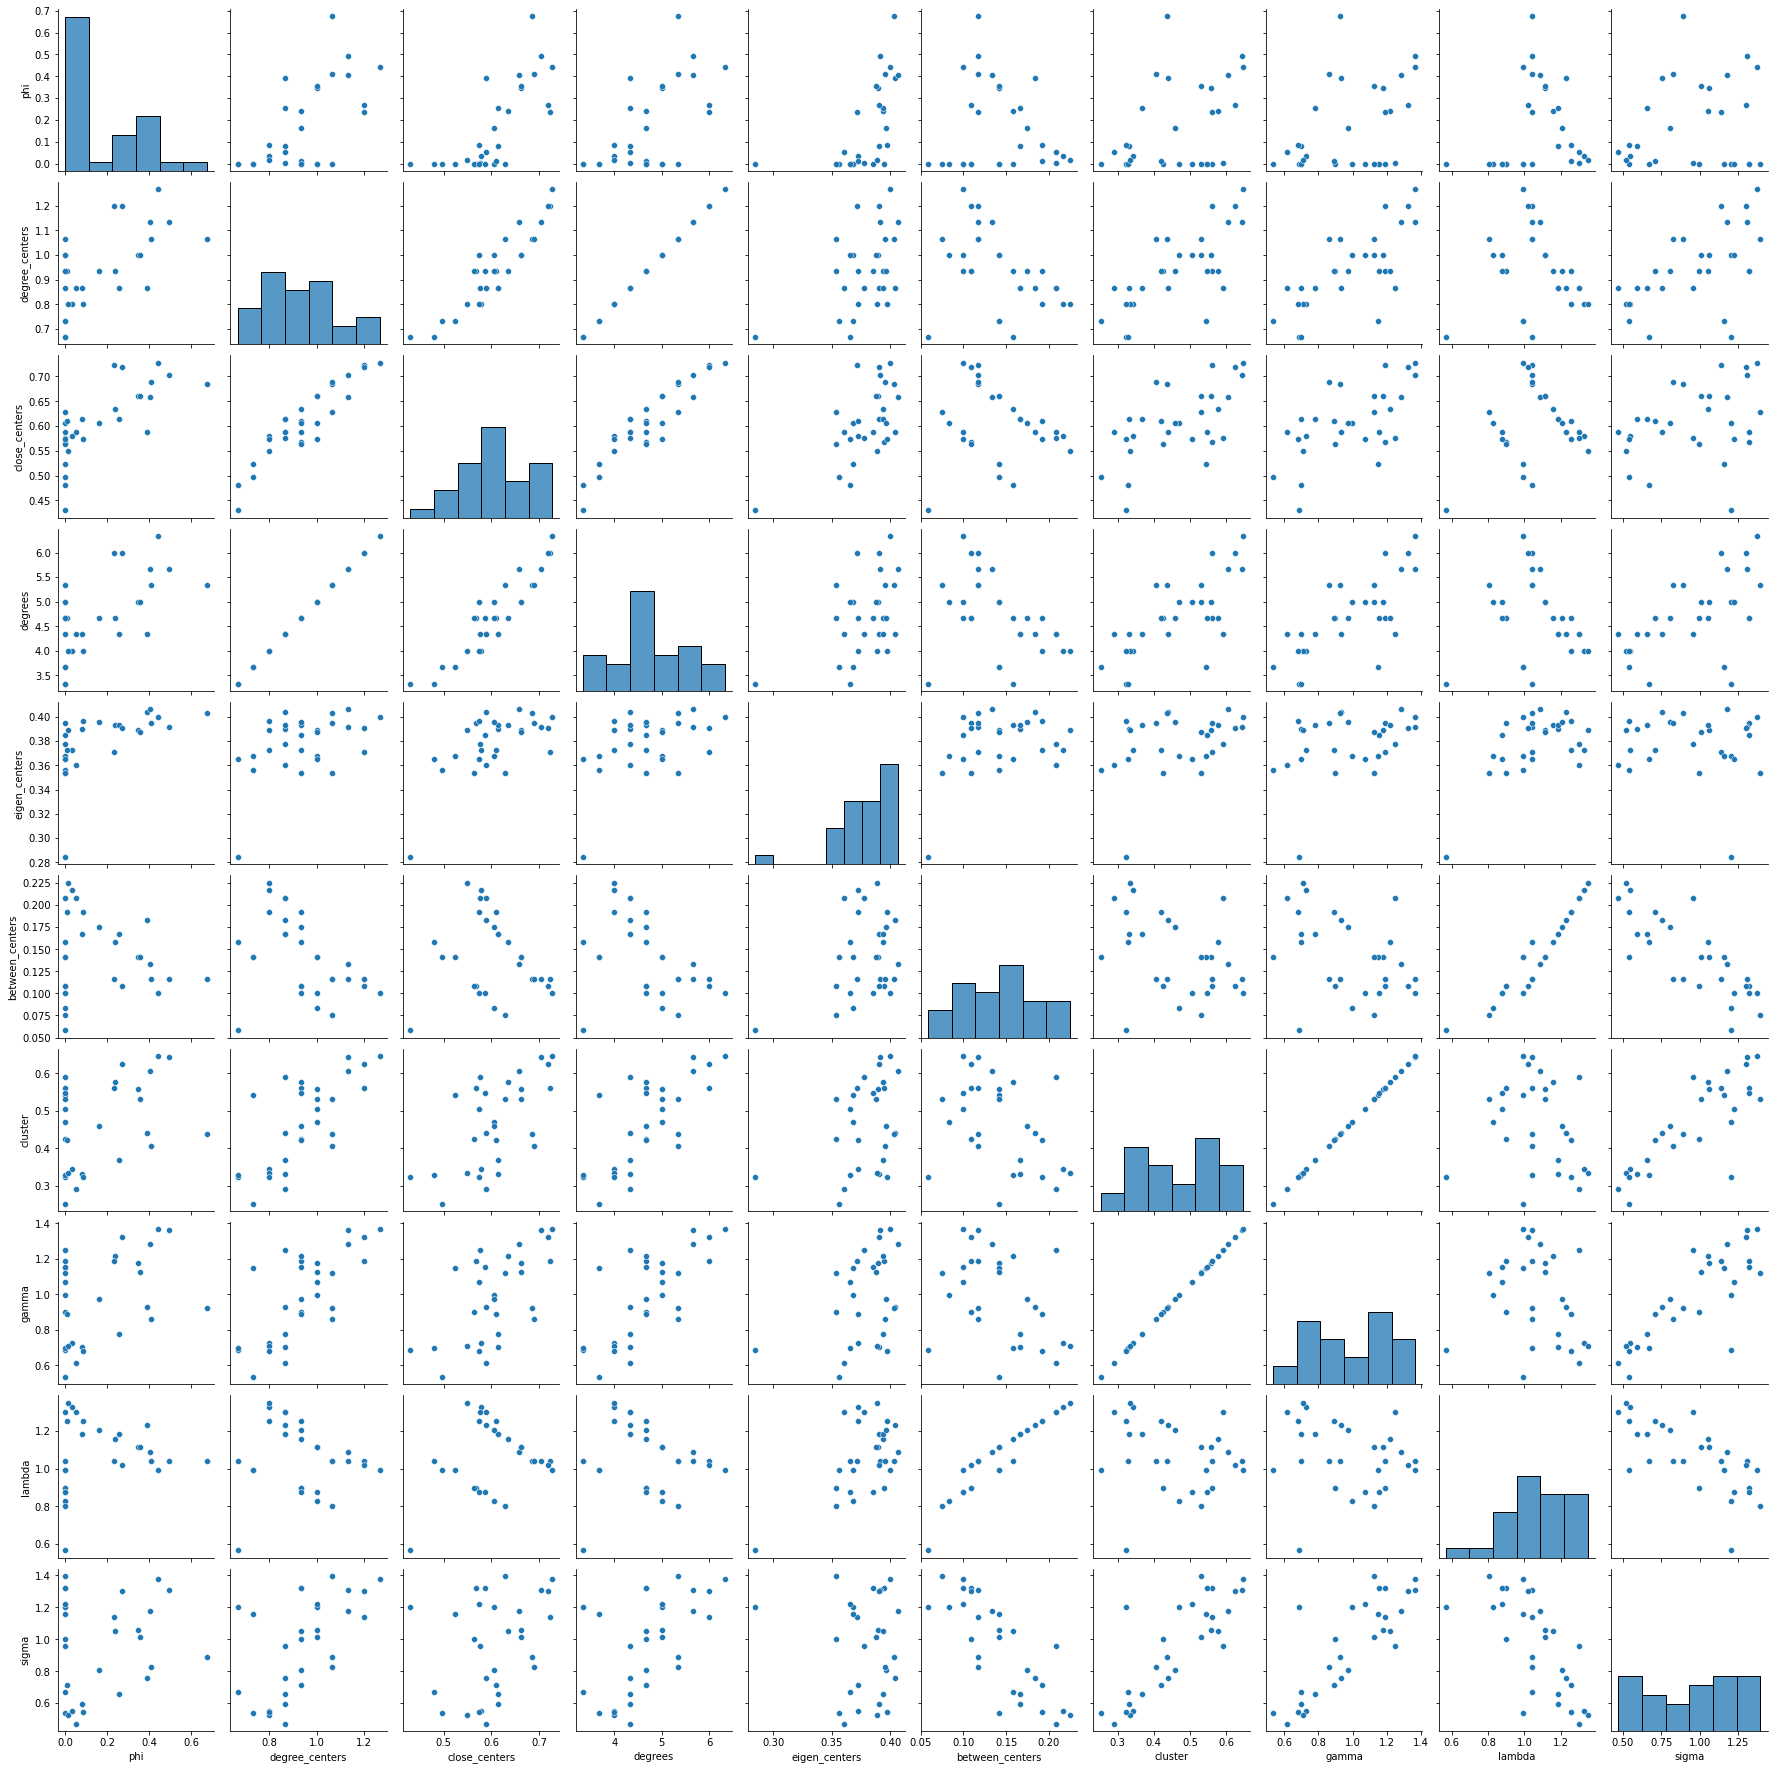

In [40]:
mean_dic = {"phi":phis_list, "degree_centers":mean_degree_centers, "close_centers":mean_close_centers, "degrees":mean_degrees, "eigen_centers":mean_eigen_centers,"between_centers":mean_between_centers,"cluster":mean_cluster, "gamma":gamma,"lambda":s_lambda,"sigma":sigma}
mean_df = pd.DataFrame(mean_dic)
sns.pairplot(mean_df)

In [92]:
smallworld = ["gamma","lambda","sigma"]
s_list = c_list + smallworld

In [94]:
print(s_list)

['degree_centers', 'close_centers', 'degrees', 'eigen_centers', 'between_centers', 'cluster', 'gamma', 'lambda', 'sigma']


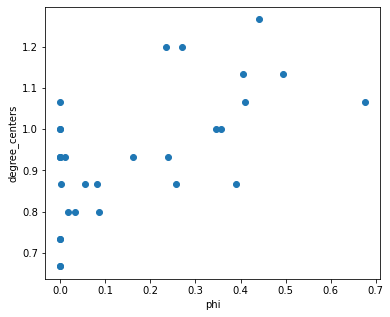

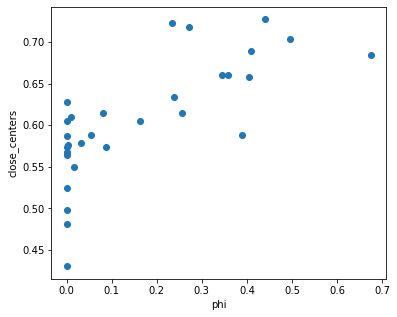

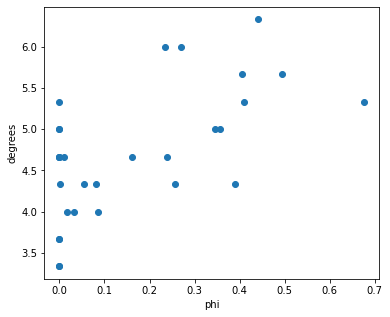

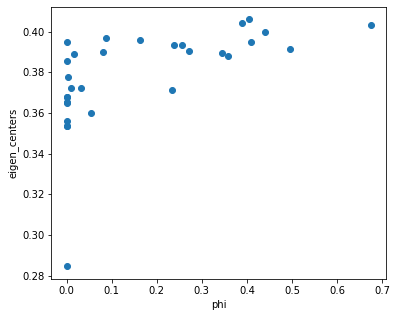

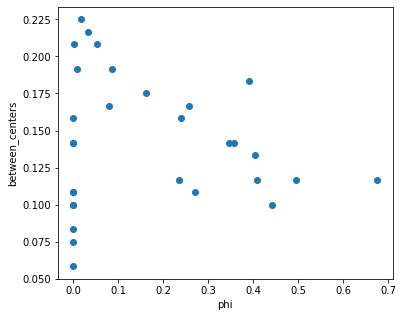

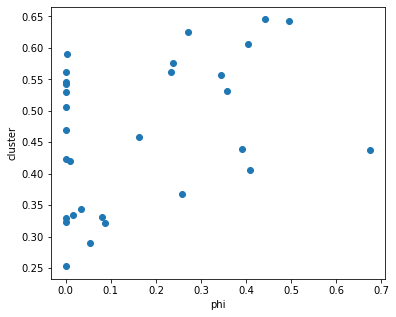

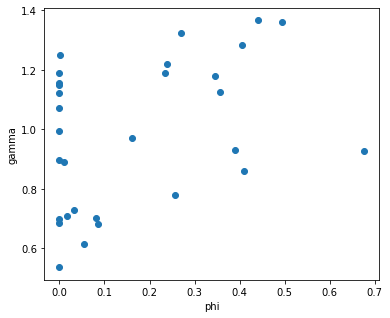

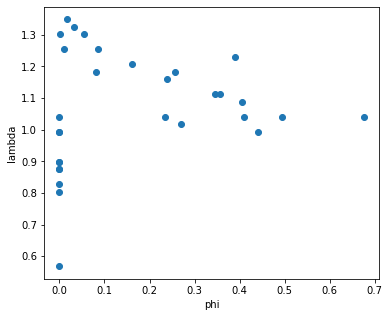

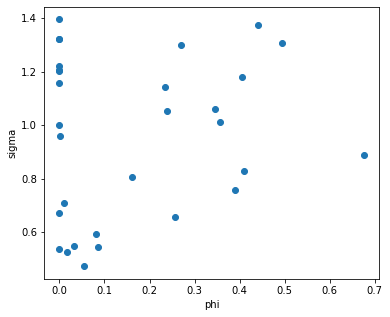

In [95]:
for i in s_list:
    
    fig_path = os.path.join("fig/{}.jpg").format(i)
    fig, ax = plt.subplots(figsize=(6, 5))
    plt.scatter(mean_df["phi"], mean_df[i])
    plt.xlabel("phi")
    plt.ylabel(i)
    plt.savefig(fig_path) 
    plt.show()
